In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('data_cleaned.csv')
df

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.000000,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.000000,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.000000,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.000000,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,13.0000,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
887,1,19.000000,30.0000,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
888,0,29.699118,23.4500,0,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
889,1,26.000000,30.0000,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0


In [7]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [8]:
from sklearn.model_selection import train_test_split as tt
train_x,val_x,train_y,val_y=tt(x,y,random_state=101,stratify=y)

In [12]:
from sklearn.tree import DecisionTreeClassifier
dd=DecisionTreeClassifier(max_depth=2)
dd.fit(train_x,train_y)
dd.score(train_x,train_y)
dd.score(val_x,val_y)

0.7354260089686099

In [14]:
from sklearn.ensemble import RandomForestClassifier
rr=RandomForestClassifier()
rr.fit(train_x,train_y)
rr.score(train_x,train_y)
rr.score(val_x,val_y)

0.7443946188340808

In [16]:
df=pd.read_csv('clustering.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


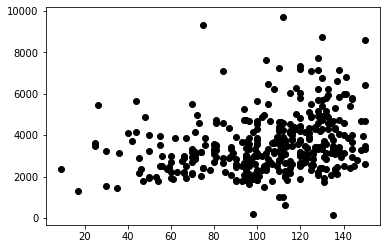

In [18]:
plt.scatter(df['LoanAmount'],df['ApplicantIncome'],c='black')

In [20]:
x=df[['LoanAmount','ApplicantIncome']]
x

,LoanAmount,ApplicantIncome
0,128.0,4583
1,66.0,3000
2,120.0,2583
3,141.0,6000
4,95.0,2333
...,...,...
376,128.0,5703
377,108.0,3232
378,71.0,2900
379,40.0,4106


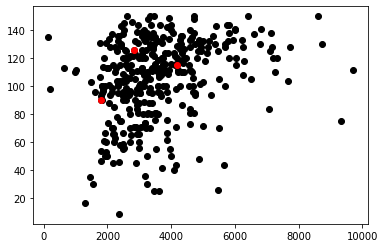

In [25]:
k=3
centroid=x.sample(n=k)
plt.scatter(df['ApplicantIncome'],df['LoanAmount'],c='black')
plt.scatter(centroid['ApplicantIncome'],centroid['LoanAmount'],c='red')

In [46]:
diff = 1
j=0

In [47]:
while(diff!=0):
    XD=x
    i=1
    for index1,row_c in centroid.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        x[i]=ED
        i=i+1

    C=[]
    for index,row in x.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(k):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    x["Cluster"]=C
    Centroids_new = x.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - centroid['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - centroid['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = x.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

0.0


In [48]:
df=pd.read_csv('student_evaluation.csv')

In [65]:
from sklearn.cluster import KMeans
k=KMeans(n_clusters=2)

In [70]:
k.fit(df)
k.inertia_

231353.7586857733

In [67]:
predict=k.predict(df)
predict

array([0, 0, 1, ..., 1, 0, 0])

In [69]:
pd.Series(predict).value_counts()

0    3148
1    2672
dtype: int64

In [71]:
x=[]
for i in range(1,20):
    k=KMeans(n_clusters=i)
    k.fit(df)
    x.append(k.inertia_)

In [72]:
y=pd.DataFrame({'cluster':range(1,20),'inertia':x})

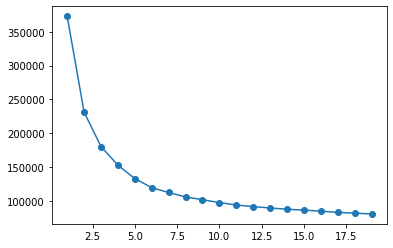

In [76]:
plt.plot(y['cluster'],y['inertia'],marker='o')

In [81]:
from sklearn.preprocessing import MinMaxScaler
scaled=MinMaxScaler()
scaled_x=scaled.fit_transform(df)
df=pd.DataFrame(scaled_x,columns=df.columns)
df

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,0.0,0.083333,0.0,0.00,0.75,0.50,0.50,0.50,0.50,0.50,...,0.5,0.5,0.5,0.5,0.50,0.5,0.5,0.5,0.5,0.5
1,0.0,0.083333,0.0,0.25,0.50,0.50,0.50,0.50,0.50,0.50,...,0.5,0.5,0.5,0.5,0.50,0.5,0.5,0.5,0.5,0.5
2,0.0,0.083333,0.0,0.50,0.75,1.00,1.00,1.00,1.00,1.00,...,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.0
3,0.0,0.083333,0.0,0.25,0.50,0.50,0.50,0.50,0.50,0.50,...,0.5,0.5,0.5,0.5,0.50,0.5,0.5,0.5,0.5,0.5
4,0.0,0.083333,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,1.0,1.000000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
5816,1.0,1.000000,0.0,0.75,0.75,0.75,0.75,0.75,0.75,0.75,...,1.0,1.0,1.0,1.0,0.75,1.0,1.0,1.0,1.0,1.0
5817,1.0,1.000000,0.0,0.00,0.75,1.00,1.00,1.00,1.00,1.00,...,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.0
5818,1.0,1.000000,0.0,0.25,0.25,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0


In [83]:
xx=[]
for i in range(1,20):
    k=KMeans(n_clusters=i)
    k.fit(df)
    xx.append(k.inertia_)

In [85]:
yy=pd.DataFrame({'cluster':range(1,20),'inertia':xx})
yy

,cluster,inertia
0,1,19789.118786
1,2,10926.738309
2,3,7744.531040
3,4,6889.250683
4,5,6364.755513
5,6,6073.813923
6,7,5861.765162
7,8,5684.066261
8,9,5551.262450
9,10,5416.127421


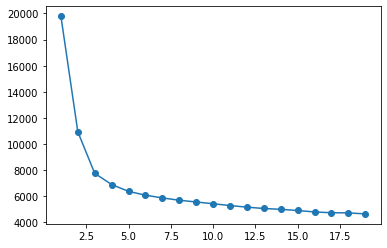

In [87]:
plt.plot(yy['cluster'],yy['inertia'],marker='o')